In [88]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

In [89]:
df = pd.read_excel('data/CAMPUS HIRES.xlsx')

In [90]:
df.describe()

,Name,Emp Id,Year of Joining,Joined,Role,Joining Function,Joining Tower,Hiring Band,Path of Joining,College,College Type,College Tier,Gender,Current Band,Attrition,DOL,Year of Leaving,Regrettable,Reason for Leaving
0,NaN,NaN,NaN,(Yes/No),(IC/Mgr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,Anvesh Gunji,40102016.0,2019.0,Yes,IC,GPSS,GAC,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,No,NaT,NaN,NaN,NaN
2,Manoj Parmar,40102120.0,2019.0,Yes,IC,GAC,GAC,7B,Direct Hire,IIT Bombay,Engineering,1.0,M,VII-B,No,NaT,NaN,NaN,NaN
3,Sravya Rumandla,40102014.0,2019.0,Yes,IC,Operations,PTP,6A,Direct Hire,IIM Calcutta,Management,1.0,F,VII-A,No,NaT,NaN,NaN,NaN
4,Arunjyoti Das,40102021.0,2019.0,Yes,IC,Operations,CP&A,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,No,NaT,NaN,NaN,NaN


In [91]:
df = df.drop(index = 0, axis = 0)
df = df.drop(['Name', 'Emp Id', 'Joining Function'], axis = 1)
df.head()

,Year of Joining,Joined,Role,Joining Tower,Hiring Band,Path of Joining,College,College Type,College Tier,Gender,Current Band,Attrition,DOL,Year of Leaving,Regrettable,Reason for Leaving
1,2019.0,Yes,IC,GAC,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,No,NaT,NaN,NaN,NaN
2,2019.0,Yes,IC,GAC,7B,Direct Hire,IIT Bombay,Engineering,1.0,M,VII-B,No,NaT,NaN,NaN,NaN
3,2019.0,Yes,IC,PTP,6A,Direct Hire,IIM Calcutta,Management,1.0,F,VII-A,No,NaT,NaN,NaN,NaN
4,2019.0,Yes,IC,CP&A,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,No,NaT,NaN,NaN,NaN
5,2019.0,Yes,IC,ATR,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,No,NaT,NaN,NaN,NaN


In [92]:
attritionLE = preprocessing.LabelEncoder()
joinedLE = preprocessing.LabelEncoder()
df['Attrition']= LE.fit_transform(df['Attrition'])
df['Joined']= LE.fit_transform(df['Joined'])
df.head()


,Year of Joining,Joined,Role,Joining Tower,Hiring Band,Path of Joining,College,College Type,College Tier,Gender,Current Band,Attrition,DOL,Year of Leaving,Regrettable,Reason for Leaving
1,2019.0,1,IC,GAC,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,0,NaT,NaN,NaN,NaN
2,2019.0,1,IC,GAC,7B,Direct Hire,IIT Bombay,Engineering,1.0,M,VII-B,0,NaT,NaN,NaN,NaN
3,2019.0,1,IC,PTP,6A,Direct Hire,IIM Calcutta,Management,1.0,F,VII-A,0,NaT,NaN,NaN,NaN
4,2019.0,1,IC,CP&A,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,0,NaT,NaN,NaN,NaN
5,2019.0,1,IC,ATR,6A,Direct Hire,IIM Bangalore,Management,1.0,M,VII-A,0,NaT,NaN,NaN,NaN


In [93]:
joinedEmpDf = df[df['Joined'] == 1]

In [94]:

attritionRateByDepartment = round(joinedEmpDf.groupby('Joining Tower').mean()['Attrition'].rename('AttritionRate')*100, 1)
totalHiresByDepartment = joinedEmpDf.groupby('Joining Tower').count()['Attrition'].rename('TotalHires')
attritionCountByDepartment = joinedEmpDf[joinedEmpDf['Attrition'] == 1].groupby('Joining Tower')['Attrition'].count()
attritionNumbersDf = pd.concat([totalHiresByDepartment, attritionCountByDepartment, attritionRateByDepartment], axis = 1)
attritionNumbersDf['Attrition'] = attritionNumbersDf['Attrition'].fillna(0)
attritionNumbersDf['NetWorkForce'] = attritionNumbersDf['TotalHires'] - attritionNumbersDf['Attrition']
attritionNumbersDf.sort_values('AttritionRate', inplace = True, ascending = False)
print(attritionNumbersDf)

                           TotalHires  Attrition  AttritionRate  NetWorkForce
Joining Tower                                                                
Tech logistics                      1        1.0          100.0           0.0
People Tech                         1        1.0          100.0           0.0
PBS                                22        9.0           40.9          13.0
PPM                                 3        1.0           33.3           2.0
FP&A                                7        2.0           28.6           5.0
CX                                 14        3.0           21.4          11.0
CP&A                               15        3.0           20.0          12.0
GAC                                58       11.0           19.0          47.0
ATR                                10        1.0           10.0           9.0
Automation                          4        0.0            0.0           4.0
IT                                 20        0.0            0.0 

<AxesSubplot:xlabel='Joining Tower'>

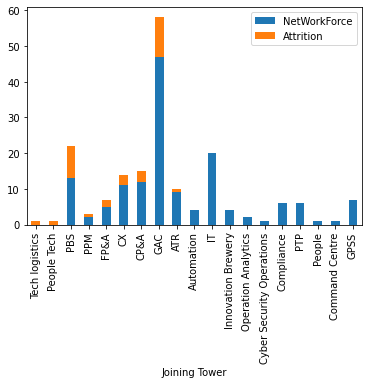

In [97]:
attritionNumbersDf.plot.bar(y = ['NetWorkForce', 'Attrition'] , stacked = True)